# BetaVAE on CARS196 dataset

The <a href="https://www.tensorflow.org/datasets/catalog/cars196">cars196</a> dataset contains 16,185 images of 196 different types of cars, which
can be used to train a supervised learning system to determine the make and model of a vehicle in a photograph.

In [2]:
#%pip install -q tfds-nightly tensorflow matplotlib

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np
from matplotlib import pyplot as plt
import model
from model import *
from methods import *

## Image size

In [2]:
height, width, depth = 64, 96, 1
batch_size = 32

## Download dataset

Let's get the data. Working on your machine, change `download` to `True` and change `DATA_DIR` to the name of the local directory you want to download the data to.

In [3]:
train_ds, test_ds = tfds.load('cars196', split=['train','test'], as_supervised=True, shuffle_files=True, download=True)

2022-06-09 20:31:19.020826: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Concatenate train and test.

In [4]:
tr_ds = train_ds.map(lambda x, y: x)
te_ds = test_ds.map(lambda x, y: x)
ds = tr_ds.concatenate(te_ds)

In [5]:
dataset = preprocessor(ds, height, width, batch_size)

In [7]:
for image_batch in dataset.take(1):
    images = image_batch.numpy()

i = 5
image = images[i,:,:,:]
img = np.expand_dims(image, 0)

### $\beta=0.001$

In [6]:
betafolder = "jobs/beta0_05/"

beta = 0.001
height, width, depth = 64, 96, 1
batch_size = 32
pad = 10 # padding for cropping
filters = [64,64,64,64]
kernels = [3,5,7,11]
hidden_dim = 1000
latent_dim = 100
image_size = (height, width, depth)
last_convdims = (int(height/(2**(len(filters)))),
                 int(width/(2**(len(filters)))))
epochs = 50

encoder = Encoder(filters=filters,kernels=kernels,hidden_dim=hidden_dim,latent_dim=latent_dim,image_shape=image_size)
decoder = Decoder(latent_dim=latent_dim,filters=filters,kernels=kernels,last_convdims=last_convdims, img_depth=depth)
checkpoint_path = betafolder + "checkpoints/latest_checkpoint"
vae0_001 = VAE(encoder, decoder, beta)
vae0_001.compile(optimizer=keras.optimizers.Adam())
vae0_001.load_weights(checkpoint_path)

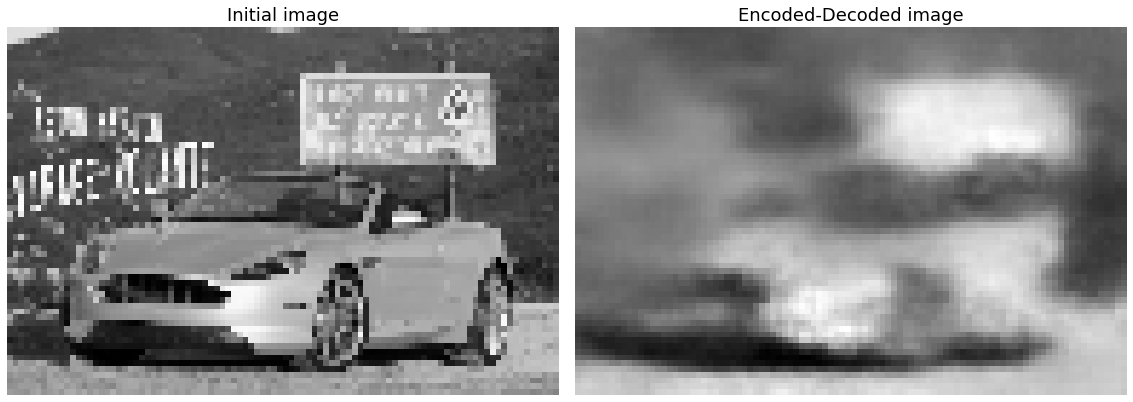

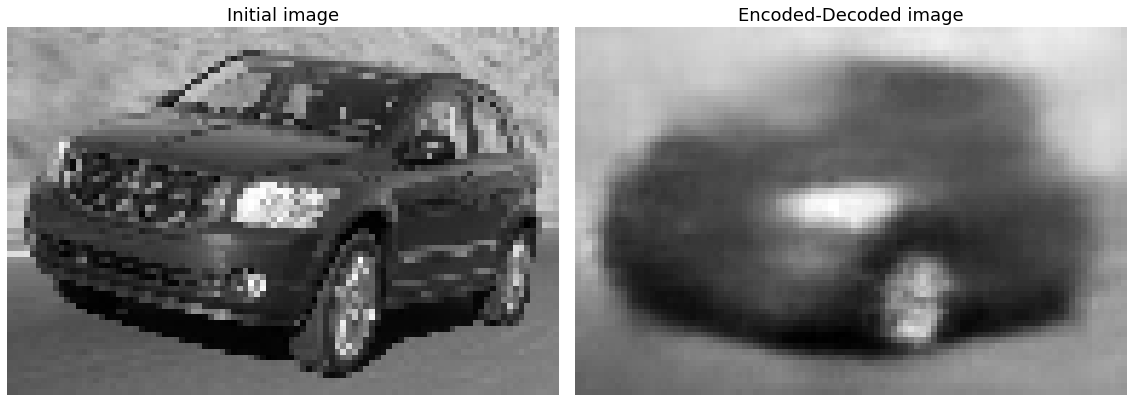

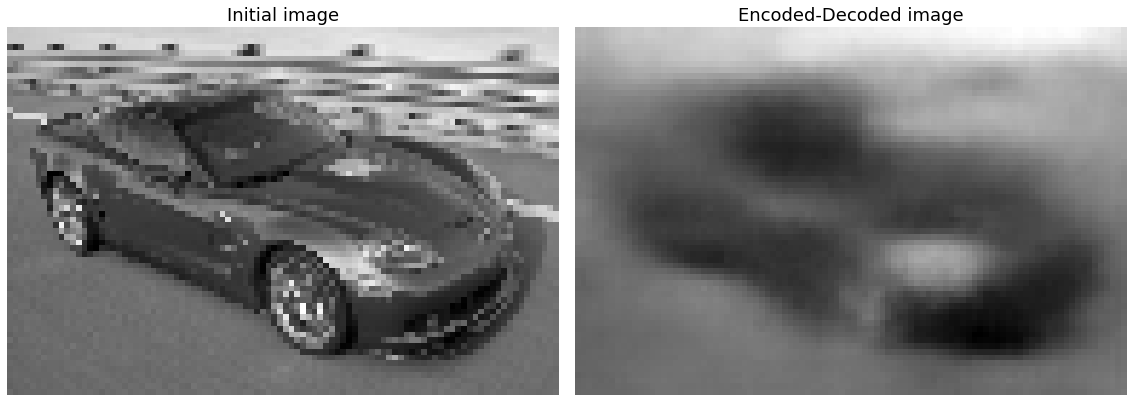

In [8]:
for i in [10,20,30]:
    show_reconstr_hor(images[i,:,:,0],vae_model=vae0_001)

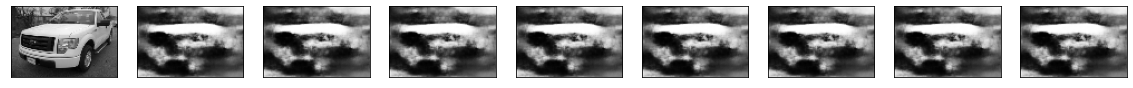

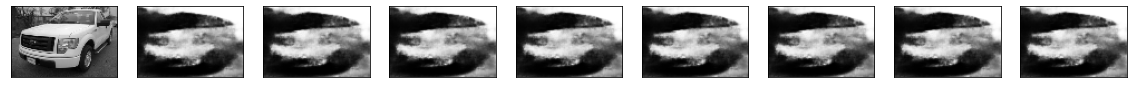

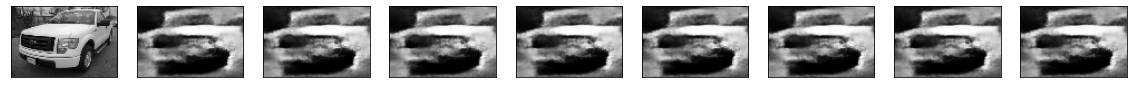

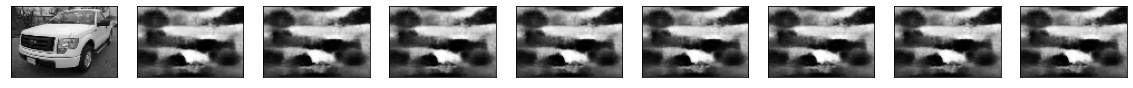

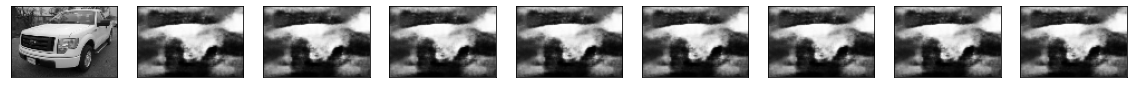

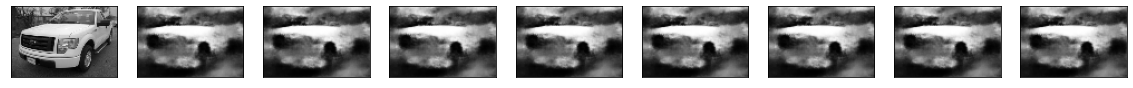

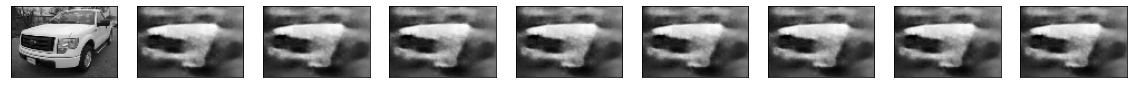

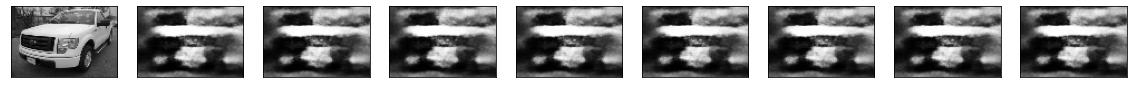

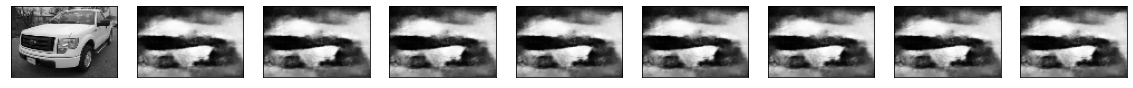

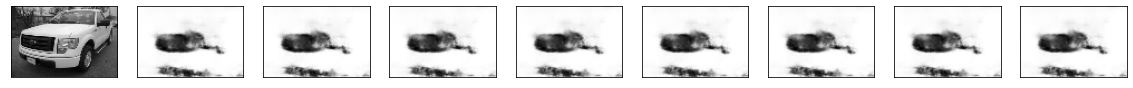

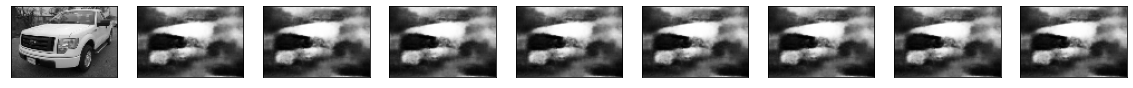

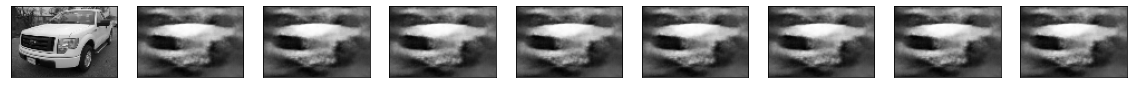

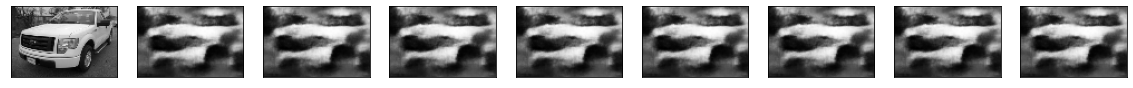

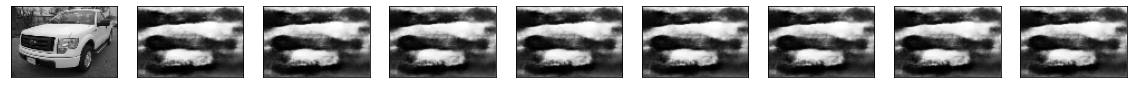

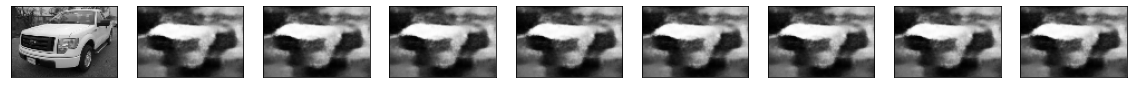

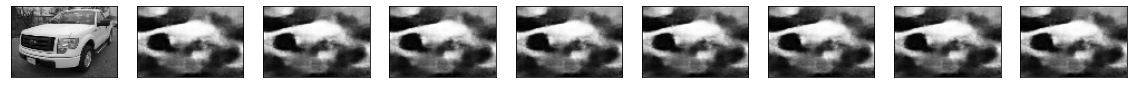

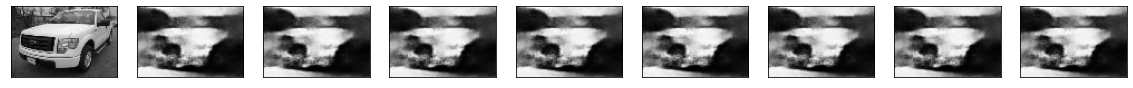

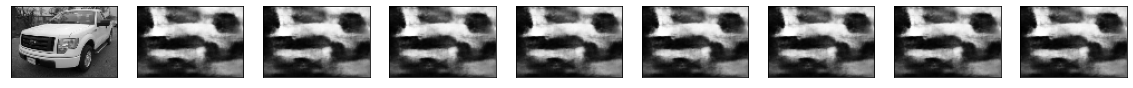

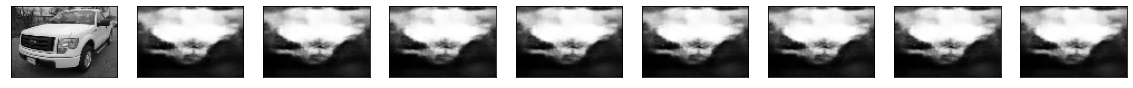

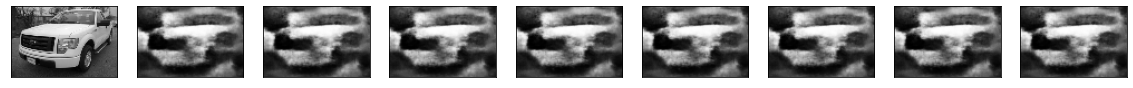

In [9]:
for i in range(0,100,5):
    generate_images2(vae_model=vae0_001, image=img, latent_dim=100, lat_feature=i, scale=20., N=8)

### $\beta=0.05$

In [10]:
betafolder = "jobs/beta0_05/"

beta = 0.05
height, width, depth = 64, 96, 1
batch_size = 32
pad = 10 # padding for cropping
filters = [64,64,64,64]
kernels = [3,5,7,11]
hidden_dim = 1000
latent_dim = 100
image_size = (height, width, depth)
last_convdims = (int(height/(2**(len(filters)))),
                 int(width/(2**(len(filters)))))
epochs = 50

encoder = Encoder(filters=filters,kernels=kernels,hidden_dim=hidden_dim,latent_dim=latent_dim,image_shape=image_size)
decoder = Decoder(latent_dim=latent_dim,filters=filters,kernels=kernels,last_convdims=last_convdims, img_depth=depth)
checkpoint_path = betafolder + "checkpoints/latest_checkpoint"
vae0_05 = VAE(encoder, decoder, beta)
vae0_05.compile(optimizer=keras.optimizers.Adam())
vae0_05.load_weights(checkpoint_path)

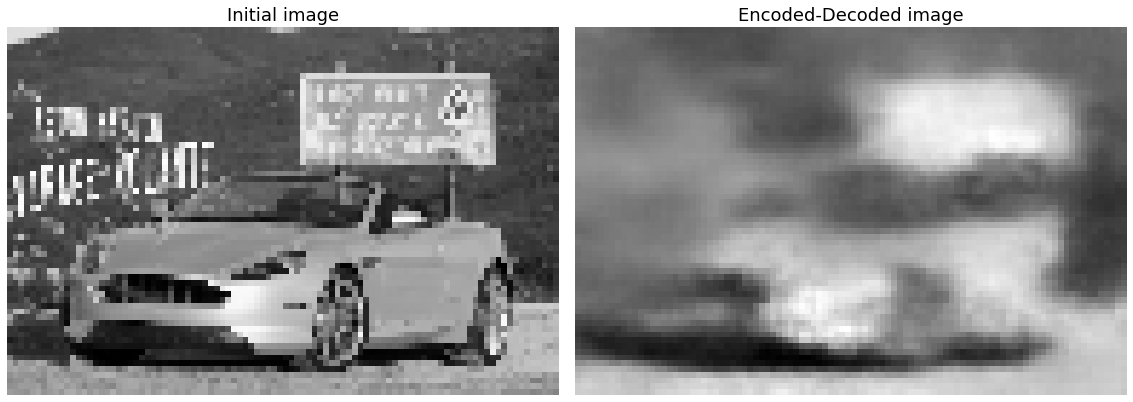

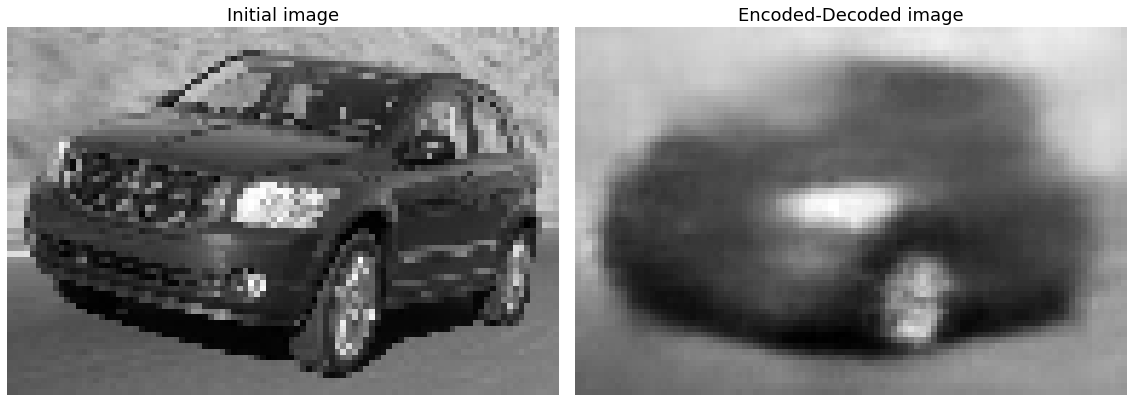

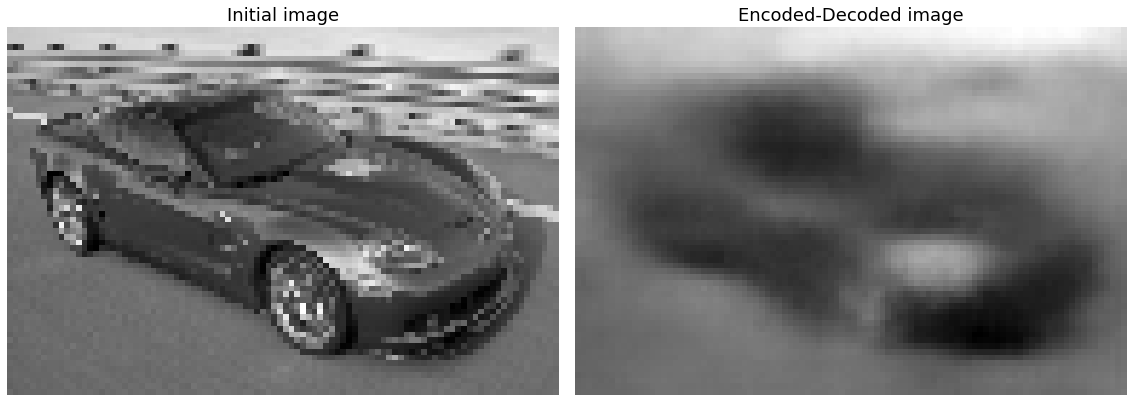

In [12]:
for i in [10,20,30]:
    show_reconstr_hor(images[i,:,:,0],vae_model=vae0_05)

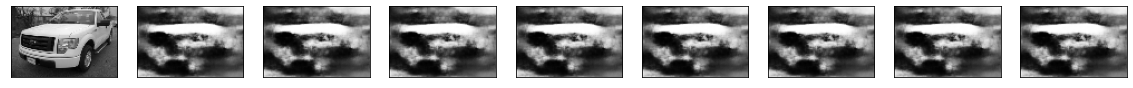

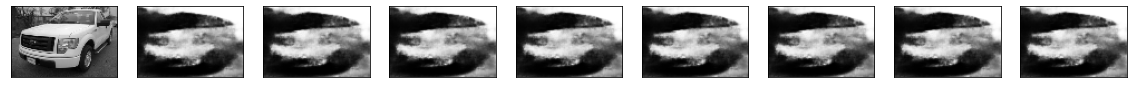

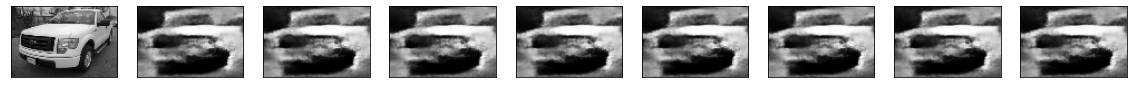

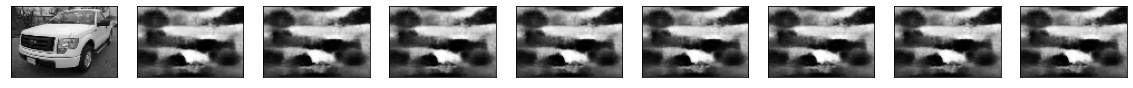

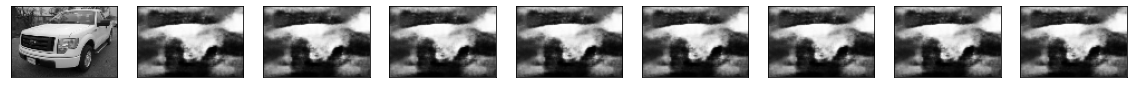

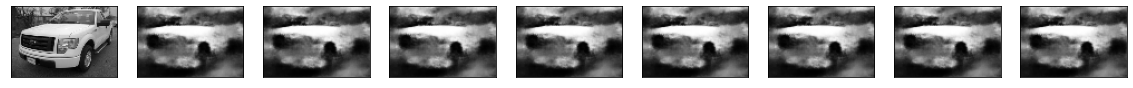

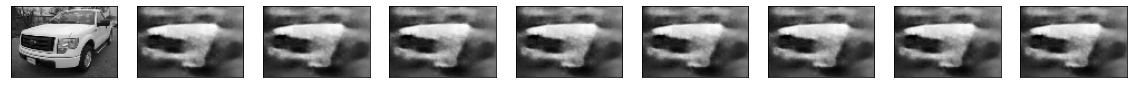

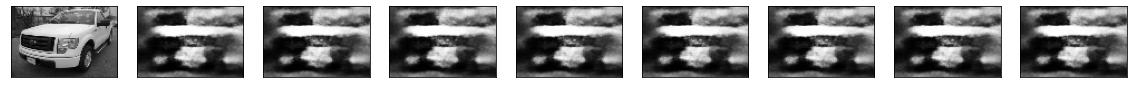

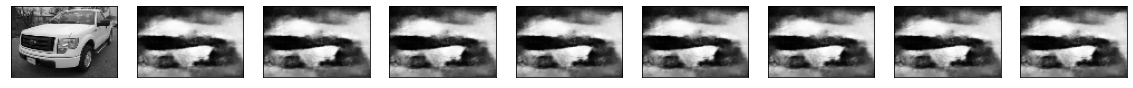

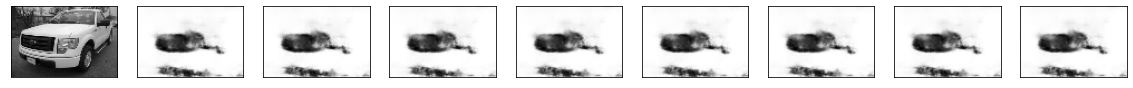

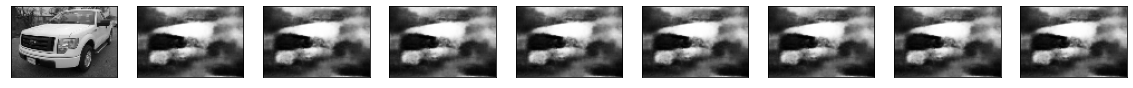

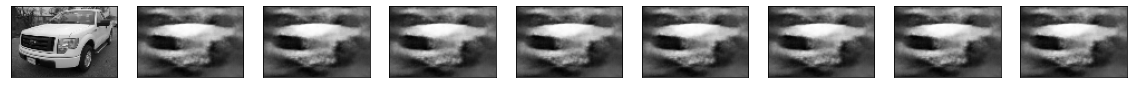

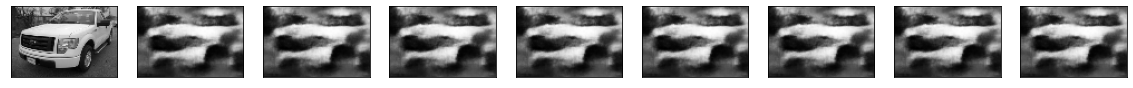

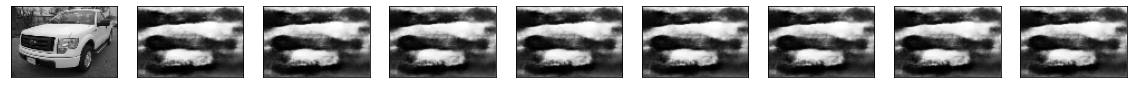

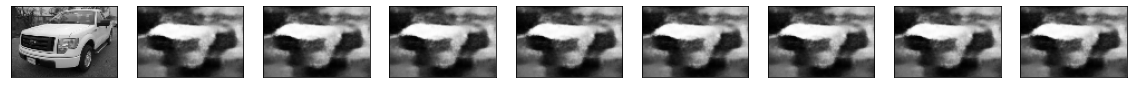

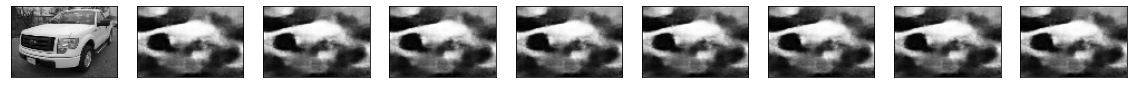

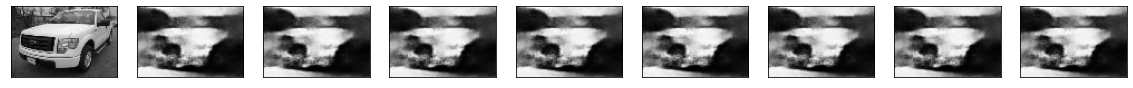

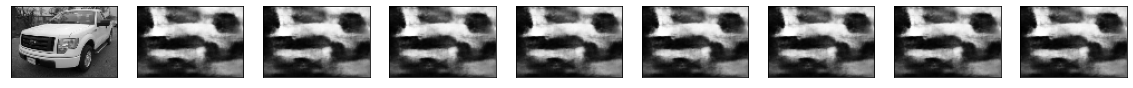

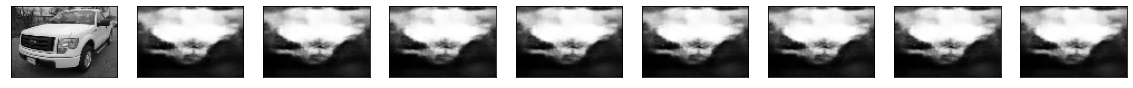

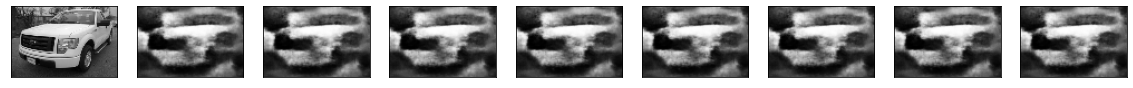

In [11]:
for i in range(0,100,5):
    generate_images2(vae_model=vae0_05, image=img, latent_dim=100, lat_feature=i, scale=20., N=8)

### $\beta=0.1$

In [16]:
betafolder = "jobs/beta0_1/"
beta = 0.1

height, width, depth = 64, 96, 1
batch_size = 32

filters = [64,64,64,64]
kernels = [3,5,7,11]
hidden_dim = 1000
latent_dim = 100
image_size = (height, width, depth)
last_convdims = (int(height/(2**(len(filters)))),
                 int(width/(2**(len(filters)))))
epochs = 50

encoder = Encoder(filters=filters,kernels=kernels,hidden_dim=hidden_dim,latent_dim=latent_dim,image_shape=image_size)
decoder = Decoder(latent_dim=latent_dim,filters=filters,kernels=kernels,last_convdims=last_convdims, img_depth=depth)
checkpoint_path = betafolder + "checkpoints/latest_checkpoint"
vae0_1 = VAE(encoder, decoder, beta)
vae0_1.compile(optimizer=keras.optimizers.Adam())
vae0_1.load_weights(checkpoint_path)

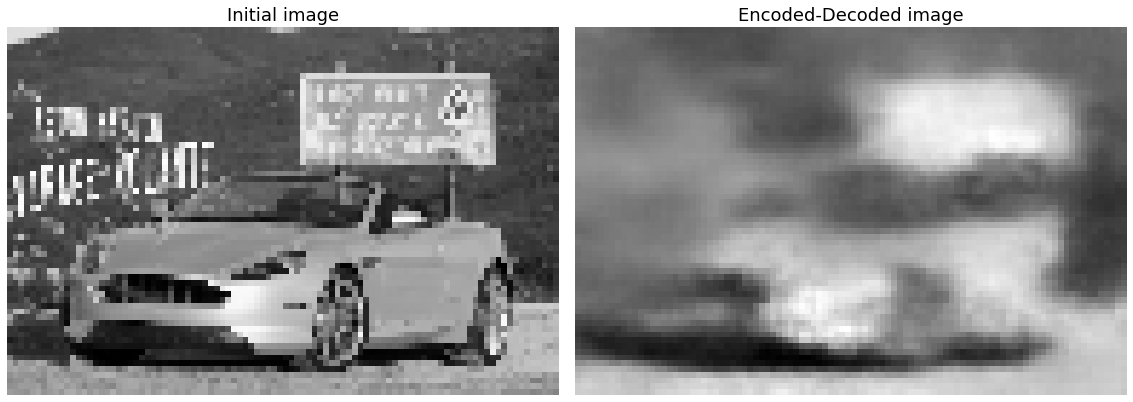

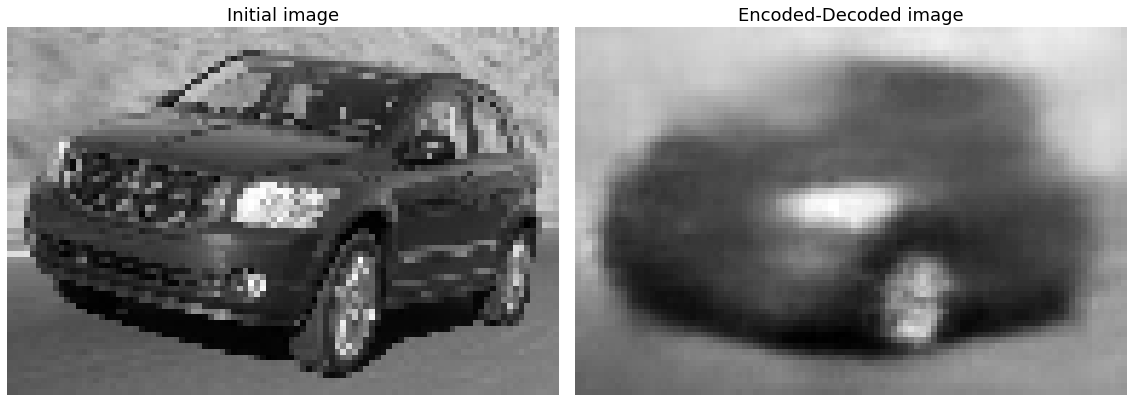

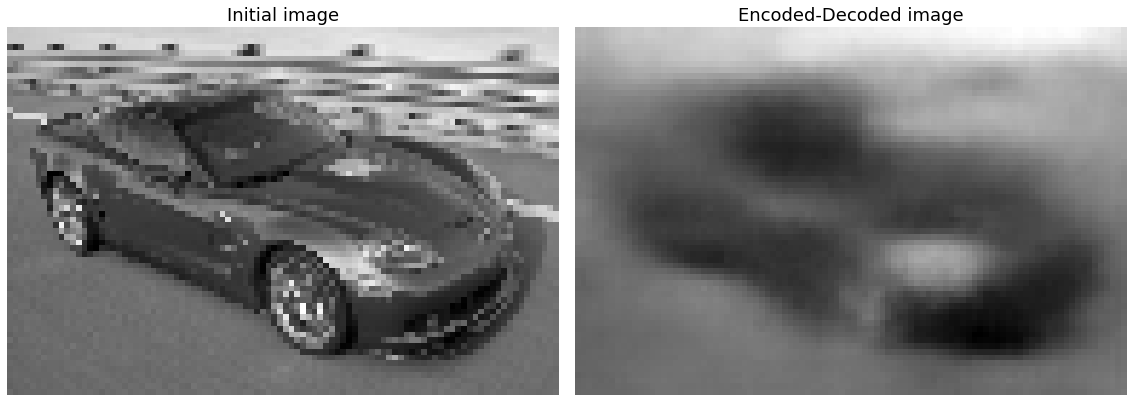

In [17]:
for i in [10,20,30]:
    show_reconstr_hor(images[i,:,:,0],vae_model=vae0_1)

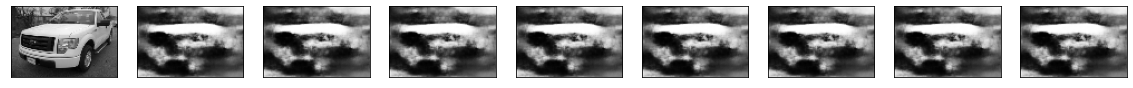

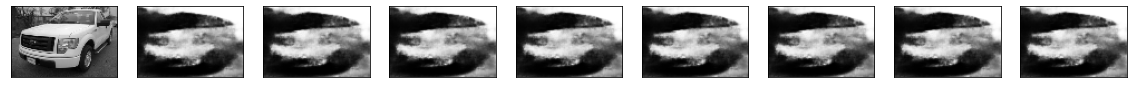

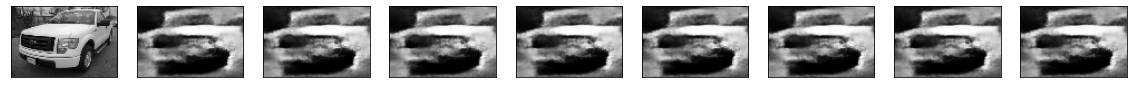

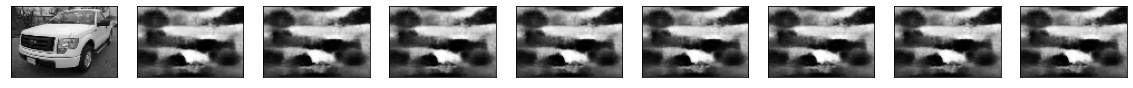

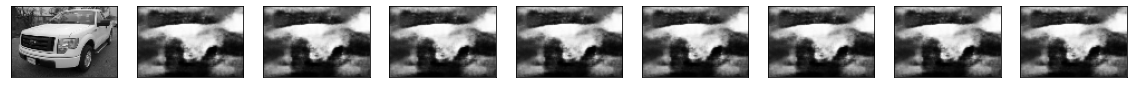

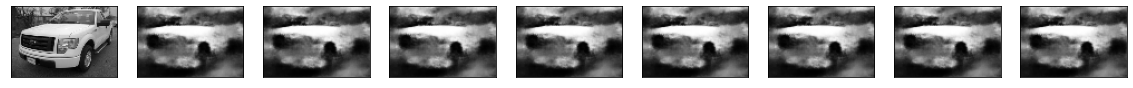

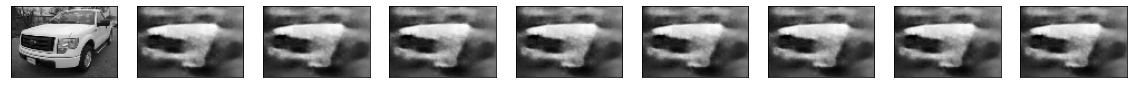

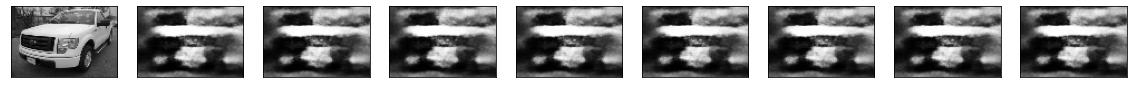

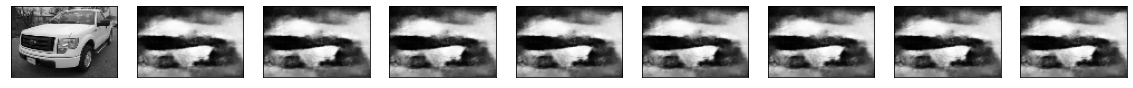

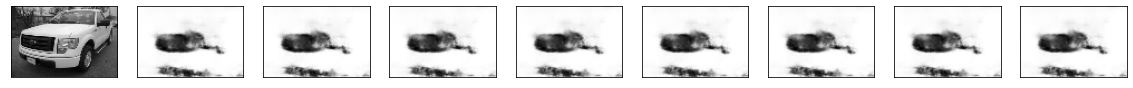

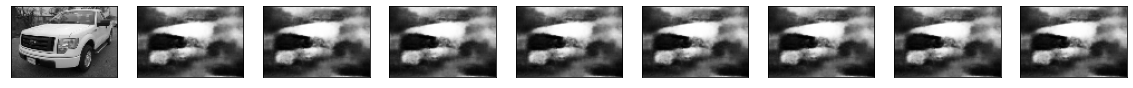

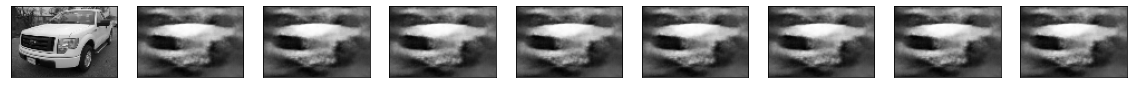

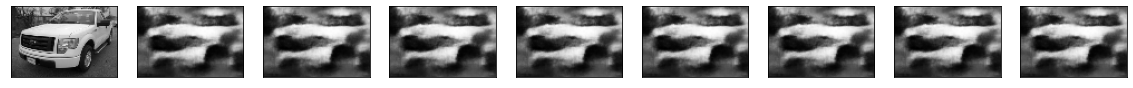

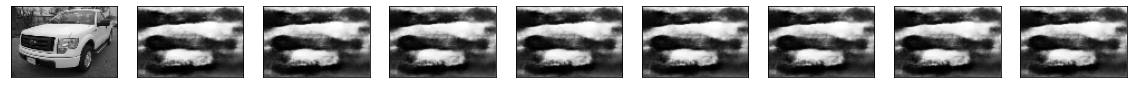

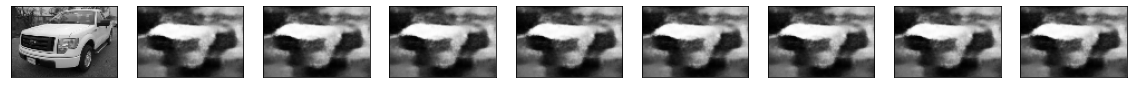

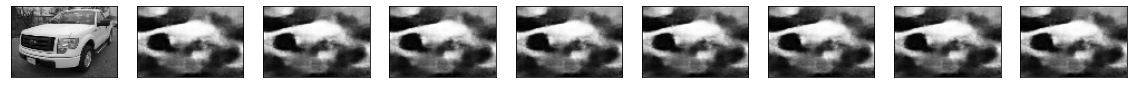

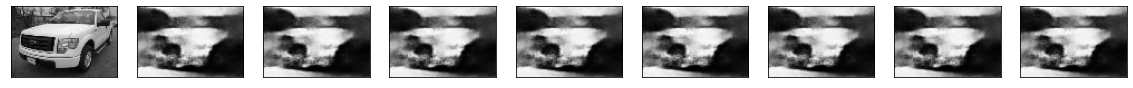

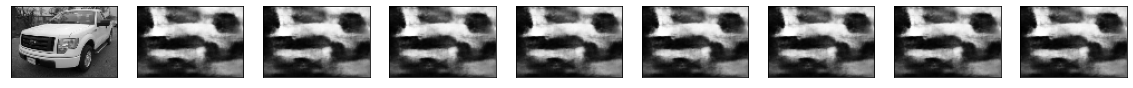

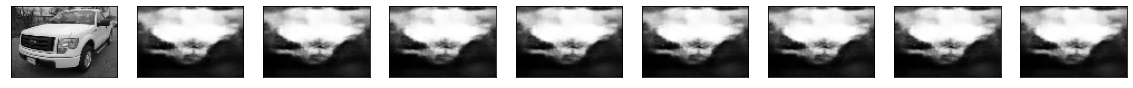

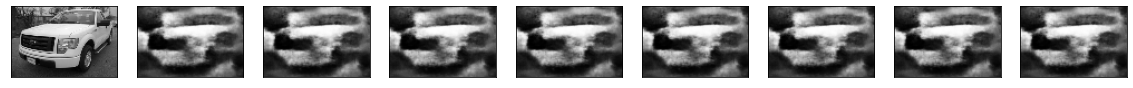

In [15]:
for i in range(0,100,5):
    generate_images2(vae_model=vae0_1, image=img, latent_dim=100, lat_feature=i, scale=20., N=8)

### $\beta=1$

In [21]:
betafolder = "jobs/beta1/"
beta = 1.

height, width, depth = 64, 96, 1
batch_size = 32

filters = [64,64,64,64]
kernels = [3,5,7,11]
hidden_dim = 1000
latent_dim = 100
image_size = (height, width, depth)
last_convdims = (int(height/(2**(len(filters)))),
                 int(width/(2**(len(filters)))))
epochs = 50

encoder = Encoder(filters=filters,kernels=kernels,hidden_dim=hidden_dim,latent_dim=latent_dim,image_shape=image_size)
decoder = Decoder(latent_dim=latent_dim,filters=filters,kernels=kernels,last_convdims=last_convdims, img_depth=depth)
checkpoint_path = betafolder + "checkpoints/latest_checkpoint"
vae1 = VAE(encoder, decoder, beta)
vae1.compile(optimizer=keras.optimizers.Adam())
vae1.load_weights(checkpoint_path)

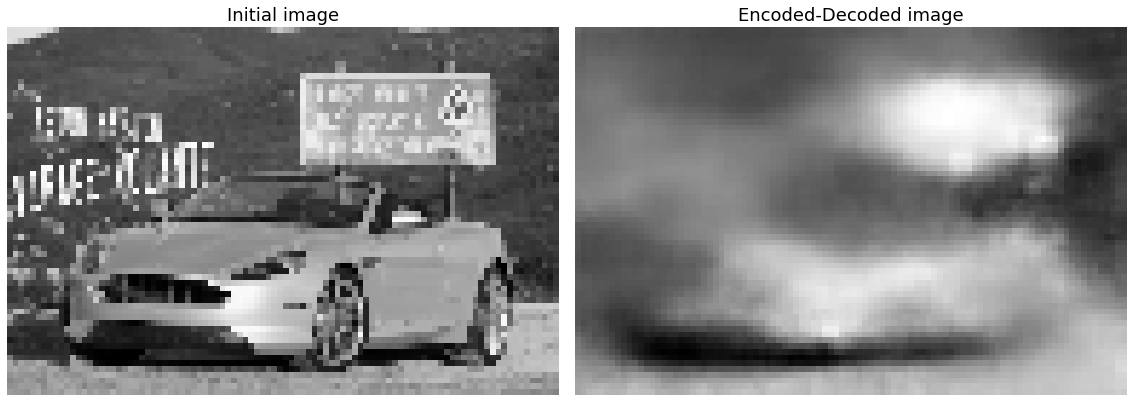

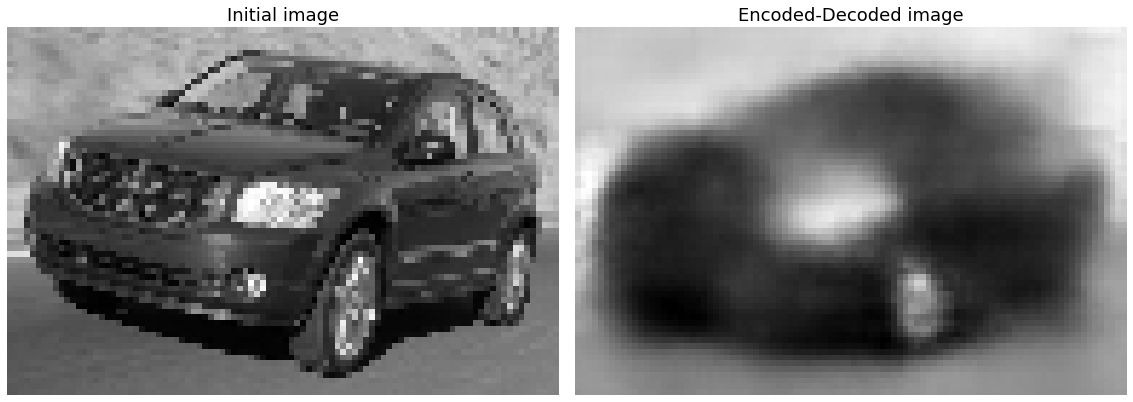

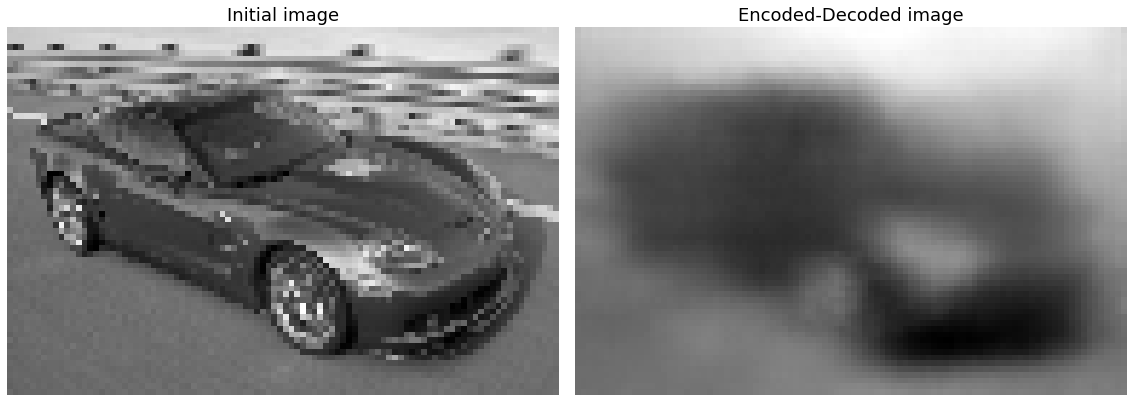

In [22]:
for i in [10,20,30]:
    show_reconstr_hor(images[i,:,:,0],vae_model=vae1)

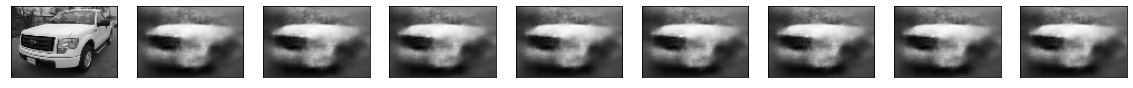

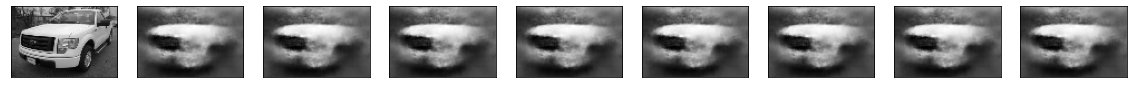

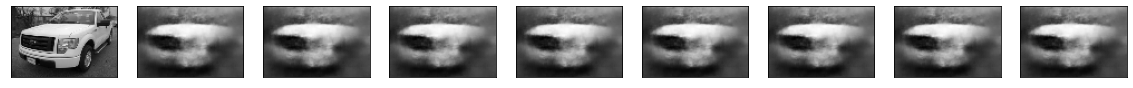

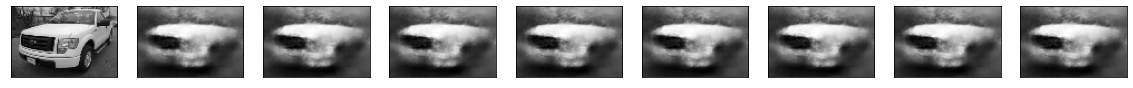

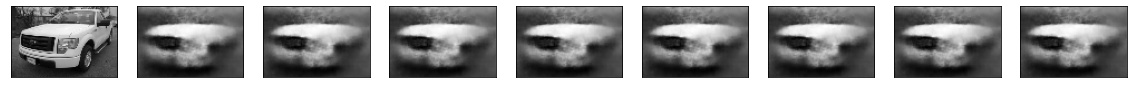

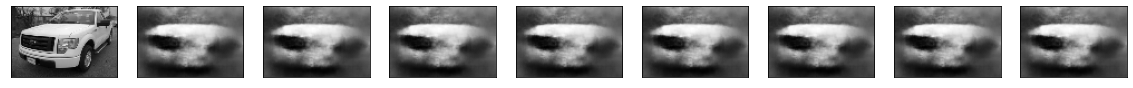

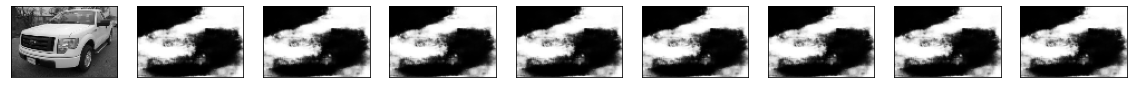

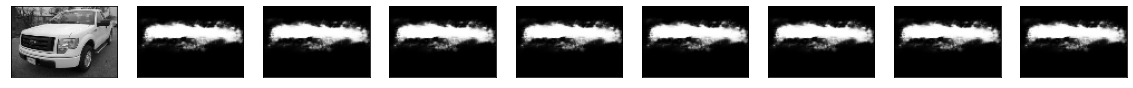

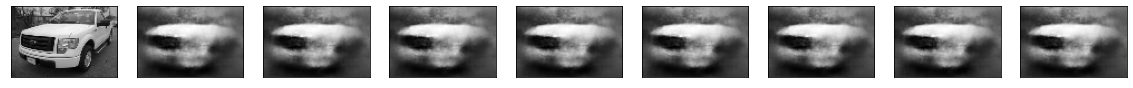

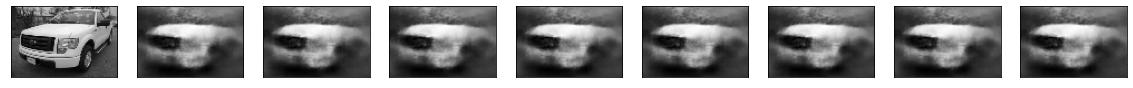

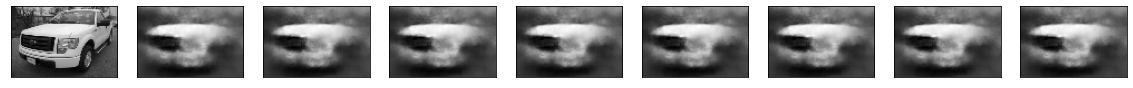

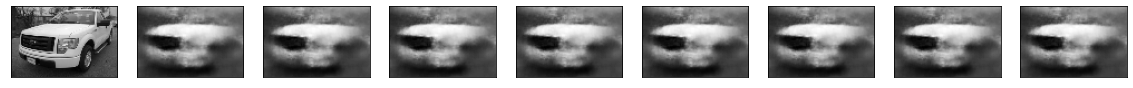

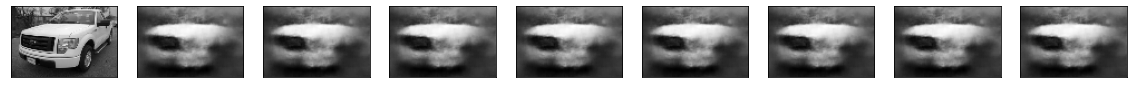

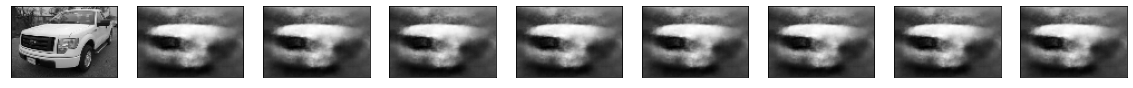

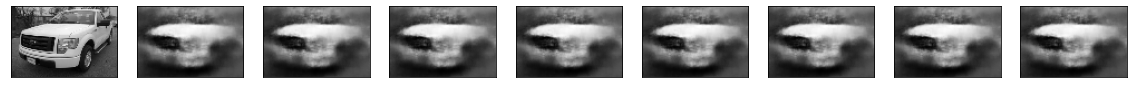

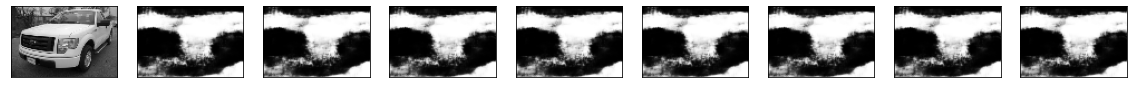

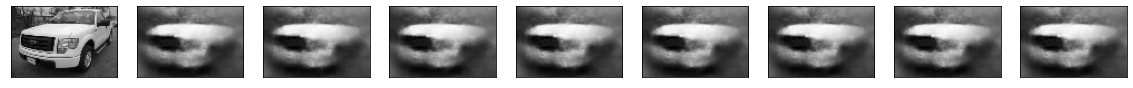

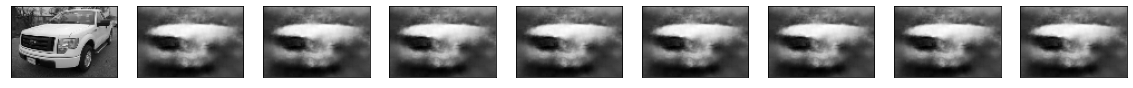

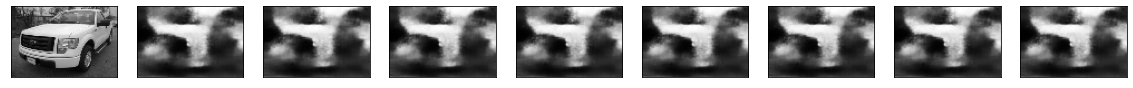

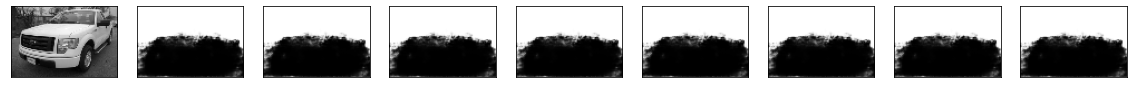

In [23]:
for i in range(0,100,5):
    generate_images2(vae_model=vae1, image=img, latent_dim=100, lat_feature=i, scale=20., N=8)

### $\beta=1.1$

In [24]:
betafolder = "jobs/beta1_1/"
beta = 1.1

height, width, depth = 64, 96, 1
batch_size = 32

filters = [64,64,64,64]
kernels = [3,5,7,11]
hidden_dim = 1000
latent_dim = 100
image_size = (height, width, depth)
last_convdims = (int(height/(2**(len(filters)))),
                 int(width/(2**(len(filters)))))
epochs = 50

encoder = Encoder(filters=filters,kernels=kernels,hidden_dim=hidden_dim,latent_dim=latent_dim,image_shape=image_size)
decoder = Decoder(latent_dim=latent_dim,filters=filters,kernels=kernels,last_convdims=last_convdims, img_depth=depth)
checkpoint_path = betafolder + "checkpoints/latest_checkpoint"
vae1_1 = VAE(encoder, decoder, beta)
vae1_1.compile(optimizer=keras.optimizers.Adam())
vae1_1.load_weights(checkpoint_path)

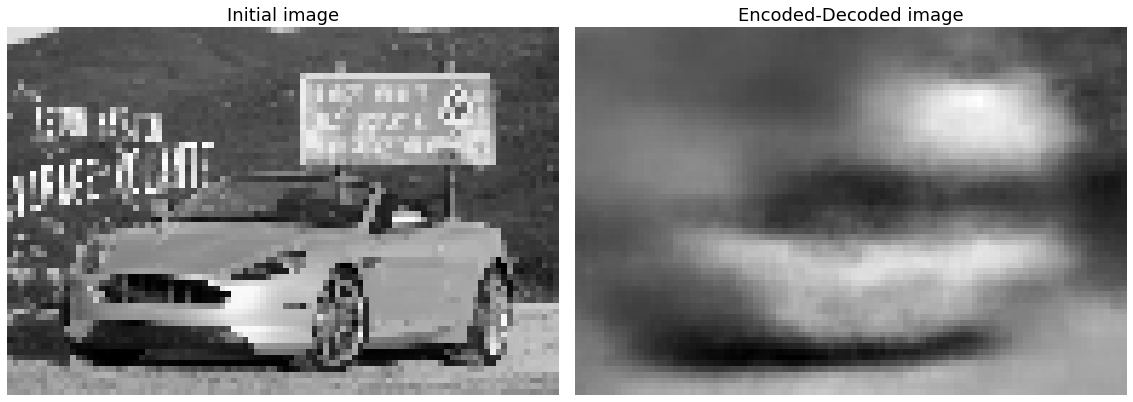

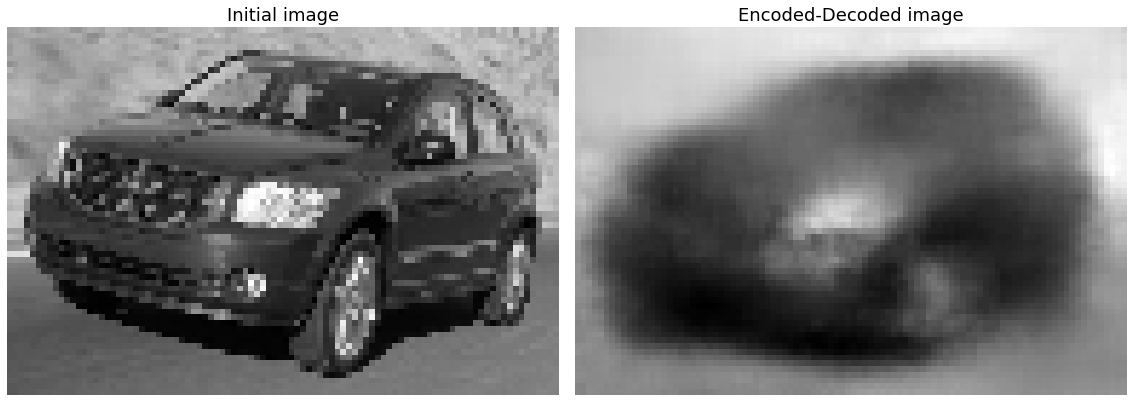

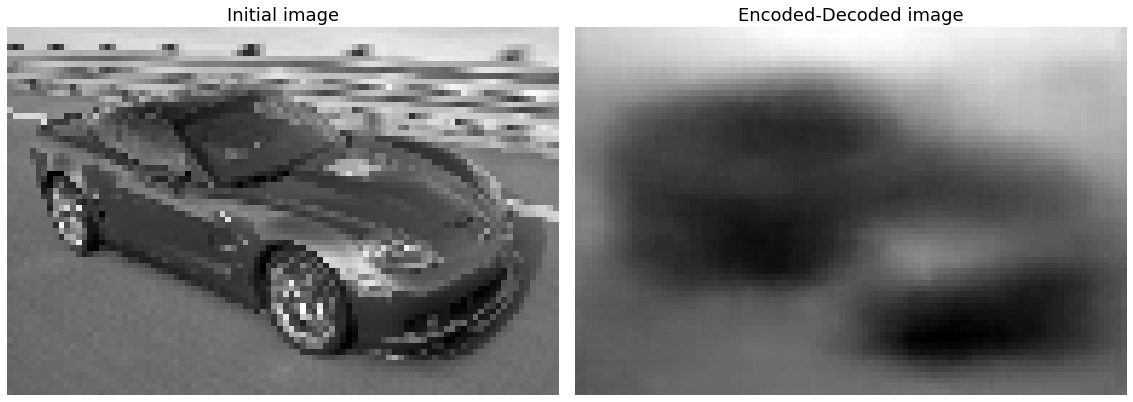

In [25]:
for i in [10,20,30]:
    show_reconstr_hor(images[i,:,:,0],vae_model=vae1_1)

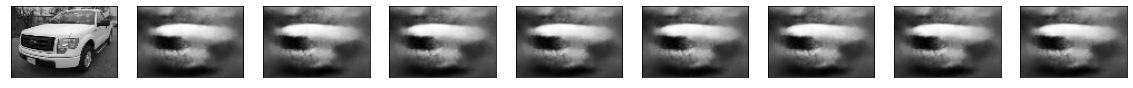

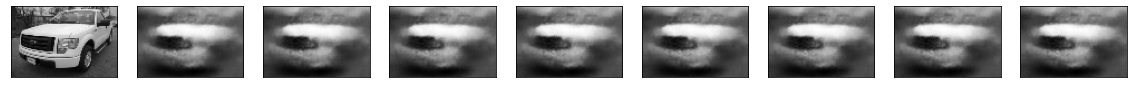

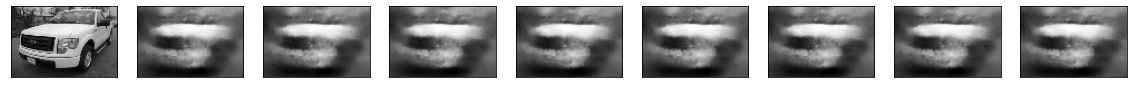

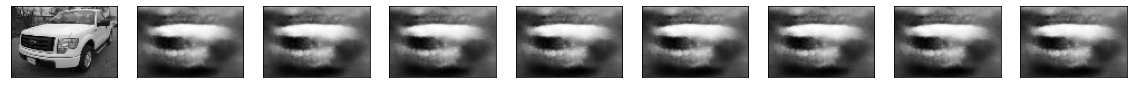

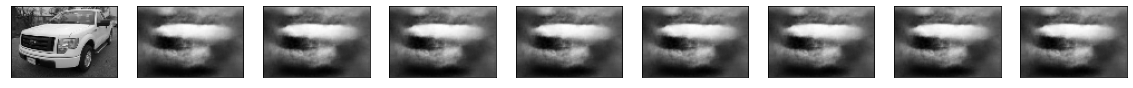

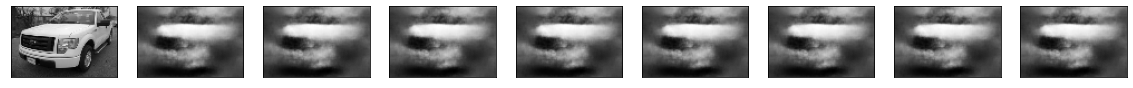

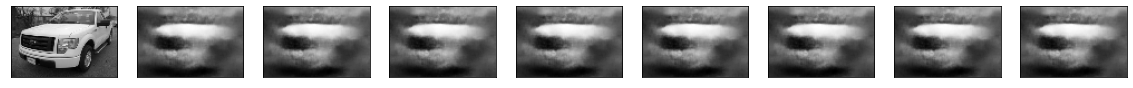

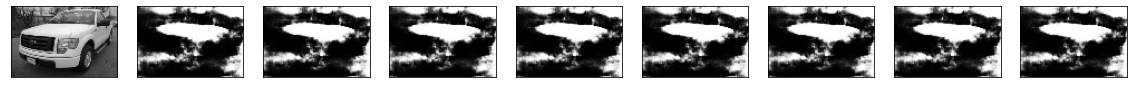

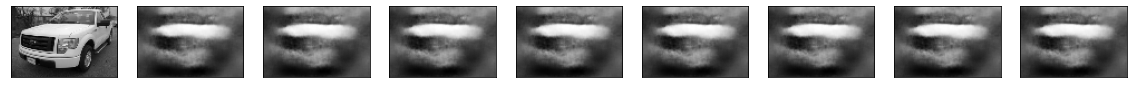

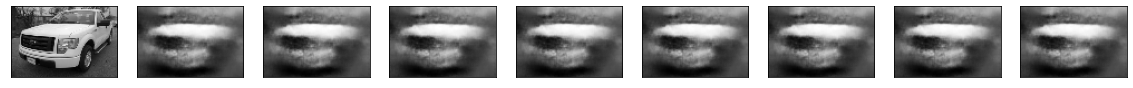

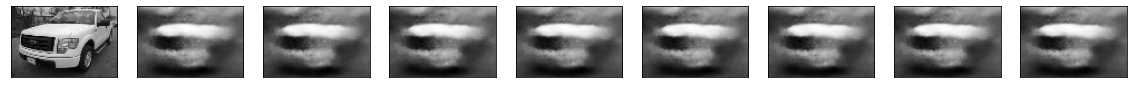

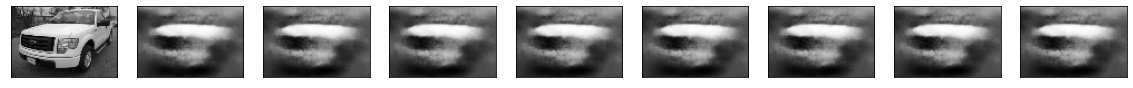

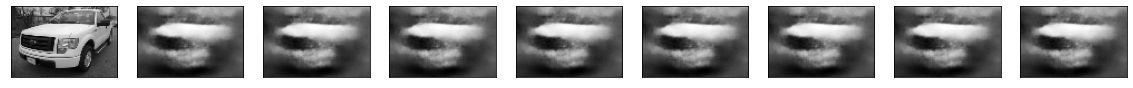

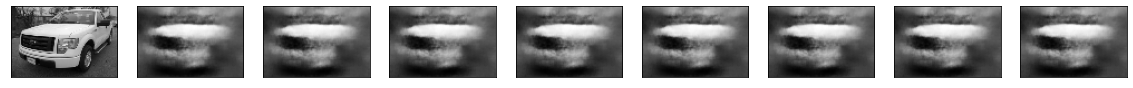

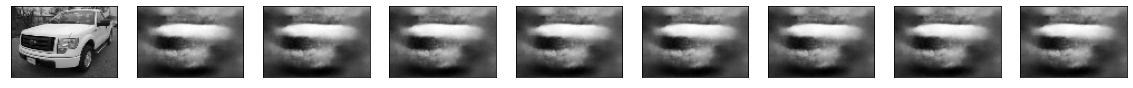

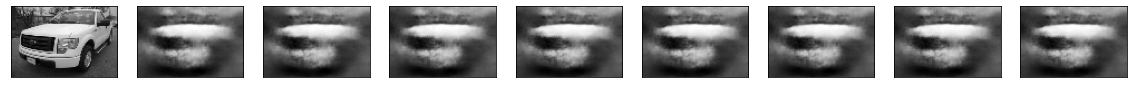

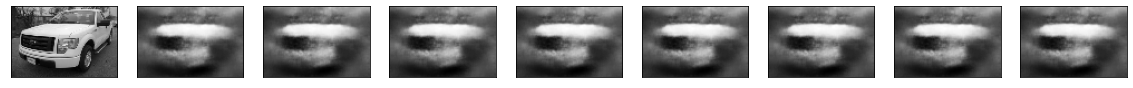

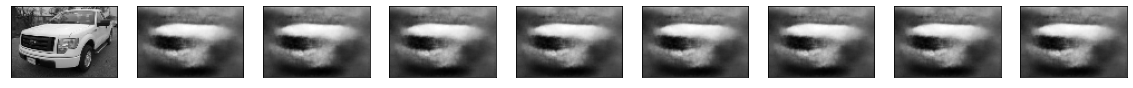

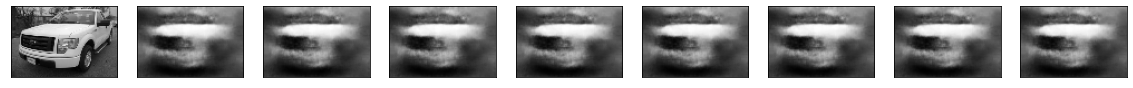

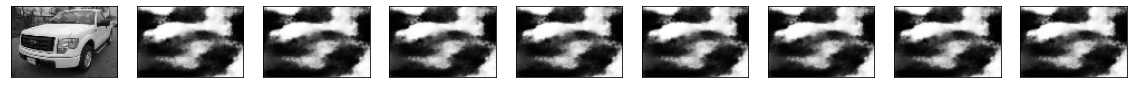

In [26]:
for i in range(0,100,5):
    generate_images2(vae_model=vae1_1, image=img, latent_dim=100, lat_feature=i, scale=20., N=8)

### $\beta=1.3$

In [27]:
betafolder = "jobs/beta1_3/"
beta = 1.3

height, width, depth = 64, 96, 1
batch_size = 32

filters = [64,64,64,64]
kernels = [3,5,7,11]
hidden_dim = 1000
latent_dim = 100
image_size = (height, width, depth)
last_convdims = (int(height/(2**(len(filters)))),
                 int(width/(2**(len(filters)))))
epochs = 50

encoder = Encoder(filters=filters,kernels=kernels,hidden_dim=hidden_dim,latent_dim=latent_dim,image_shape=image_size)
decoder = Decoder(latent_dim=latent_dim,filters=filters,kernels=kernels,last_convdims=last_convdims, img_depth=depth)
checkpoint_path = betafolder + "checkpoints/latest_checkpoint"
vae1_3 = VAE(encoder, decoder, beta)
vae1_3.compile(optimizer=keras.optimizers.Adam())
vae1_3.load_weights(checkpoint_path)

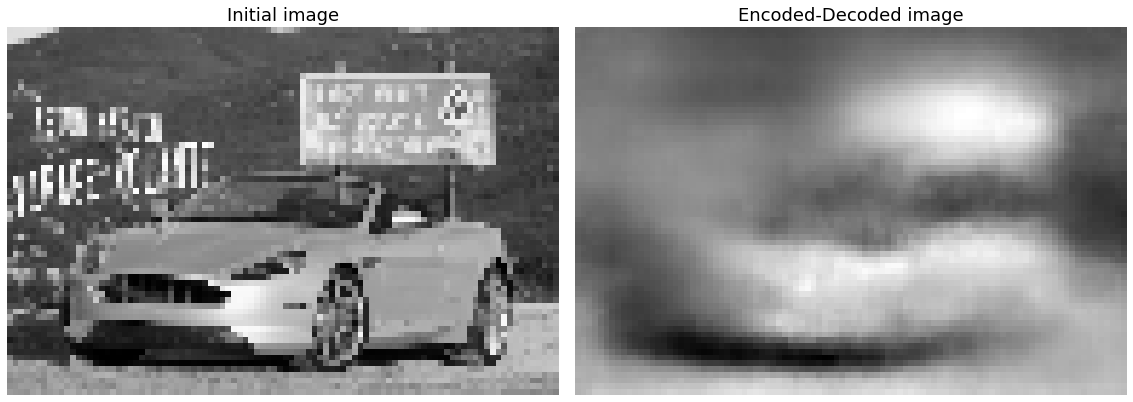

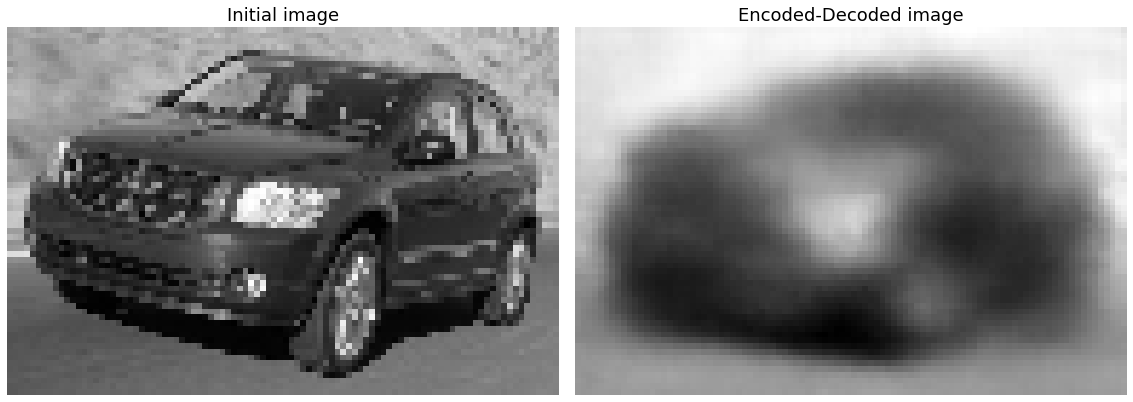

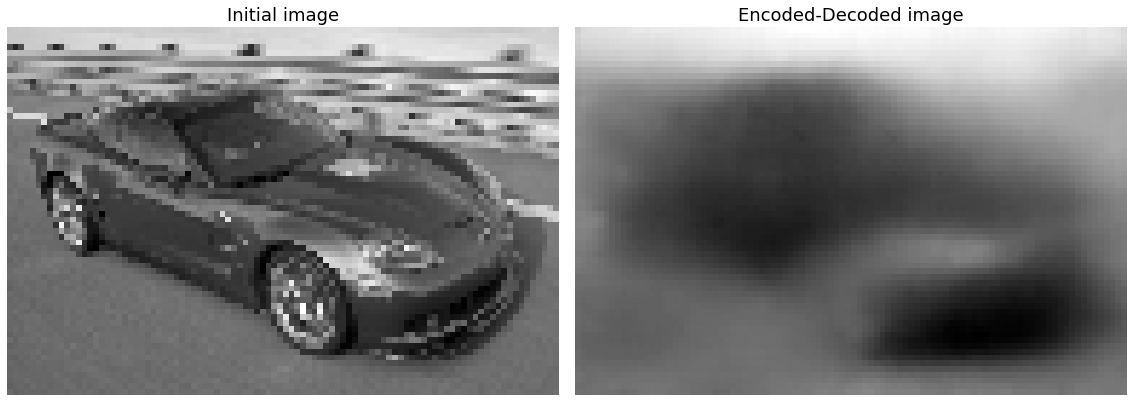

In [28]:
for i in [10,20,30]:
    show_reconstr_hor(images[i,:,:,0],vae_model=vae1_3)

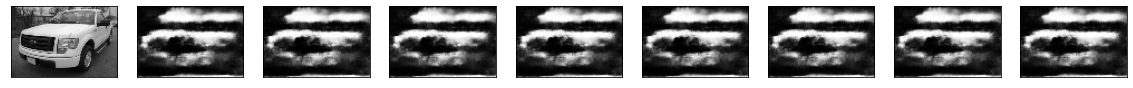

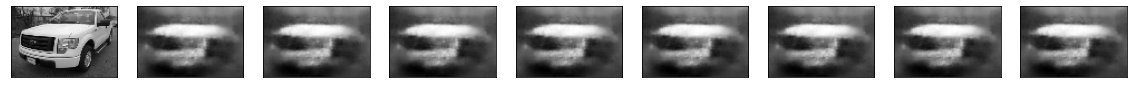

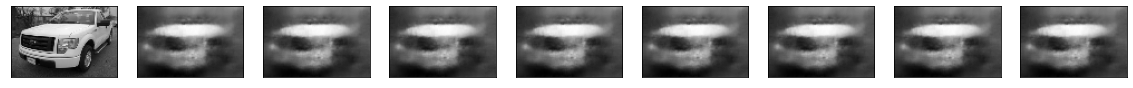

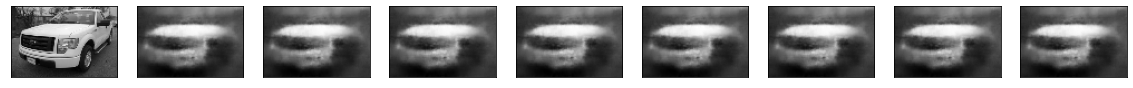

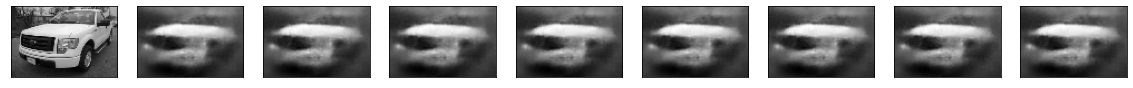

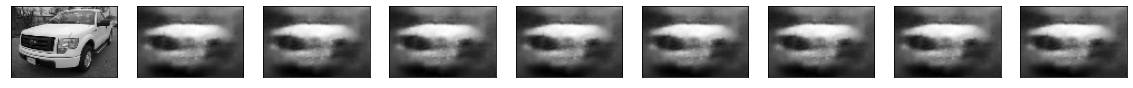

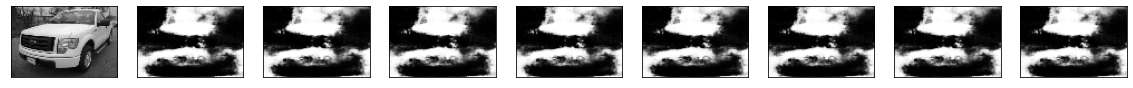

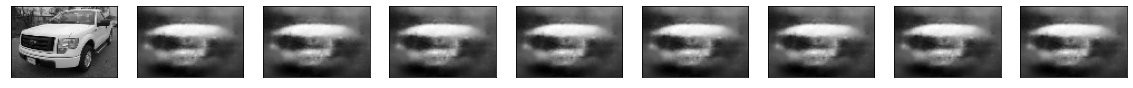

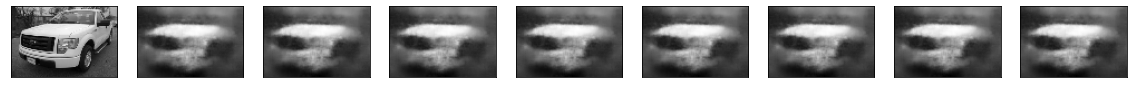

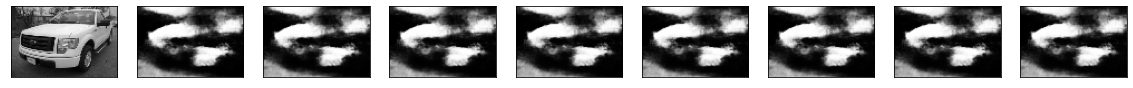

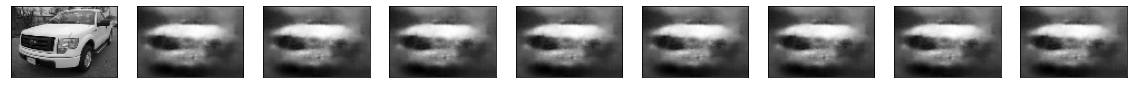

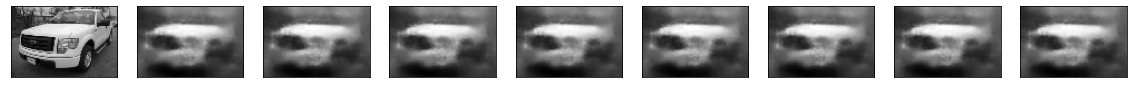

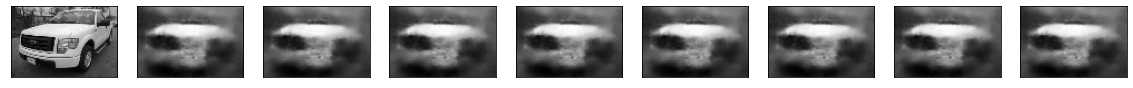

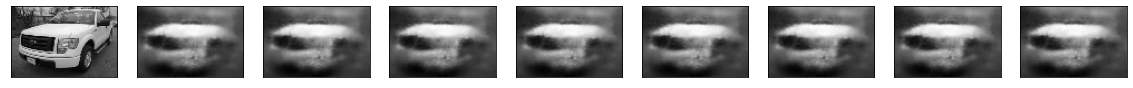

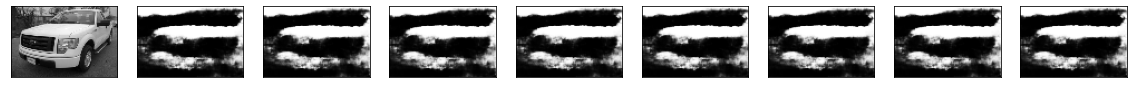

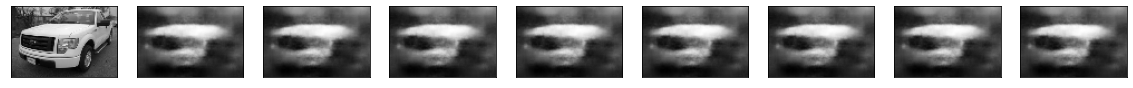

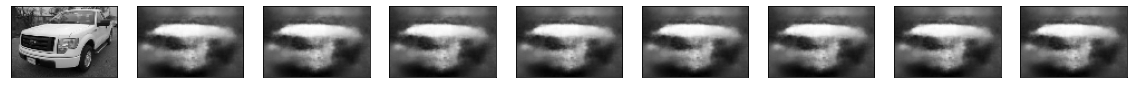

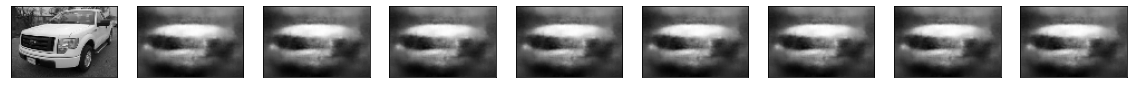

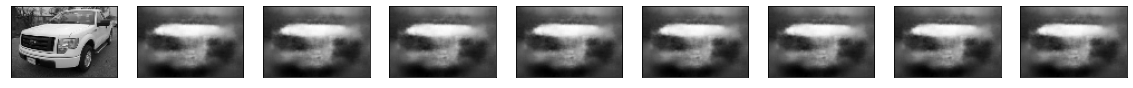

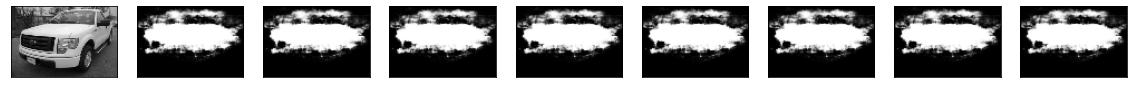

In [29]:
for i in range(0,100,5):
    generate_images2(vae_model=vae1_3, image=img, latent_dim=100, lat_feature=i, scale=20., N=8)

### $\beta=1.5$

In [30]:
betafolder = "jobs/beta1_5/"
beta = 1.5

height, width, depth = 64, 96, 1
batch_size = 32

filters = [64,64,64,64]
kernels = [3,5,7,11]
hidden_dim = 1000
latent_dim = 100
image_size = (height, width, depth)
last_convdims = (int(height/(2**(len(filters)))),
                 int(width/(2**(len(filters)))))
epochs = 50

encoder = Encoder(filters=filters,kernels=kernels,hidden_dim=hidden_dim,latent_dim=latent_dim,image_shape=image_size)
decoder = Decoder(latent_dim=latent_dim,filters=filters,kernels=kernels,last_convdims=last_convdims, img_depth=depth)
checkpoint_path = betafolder + "checkpoints/latest_checkpoint"
vae1_5 = VAE(encoder, decoder, beta)
vae1_5.compile(optimizer=keras.optimizers.Adam())
vae1_5.load_weights(checkpoint_path)

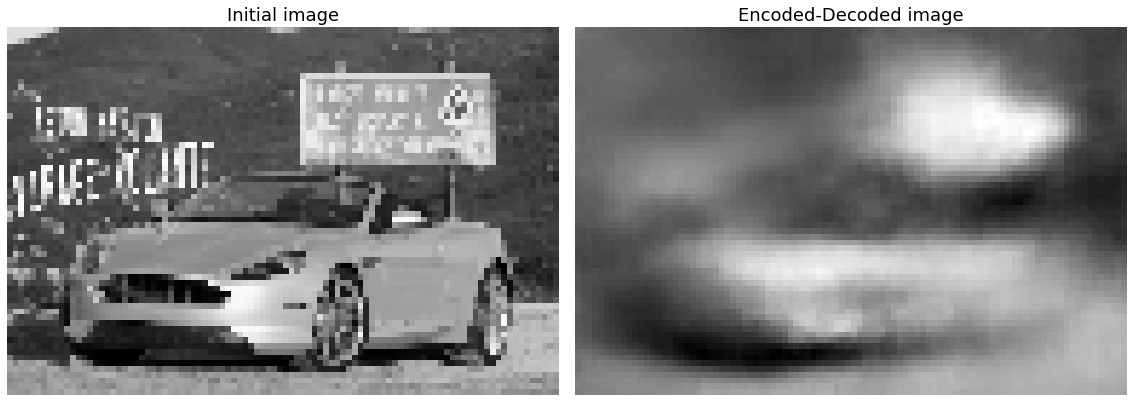

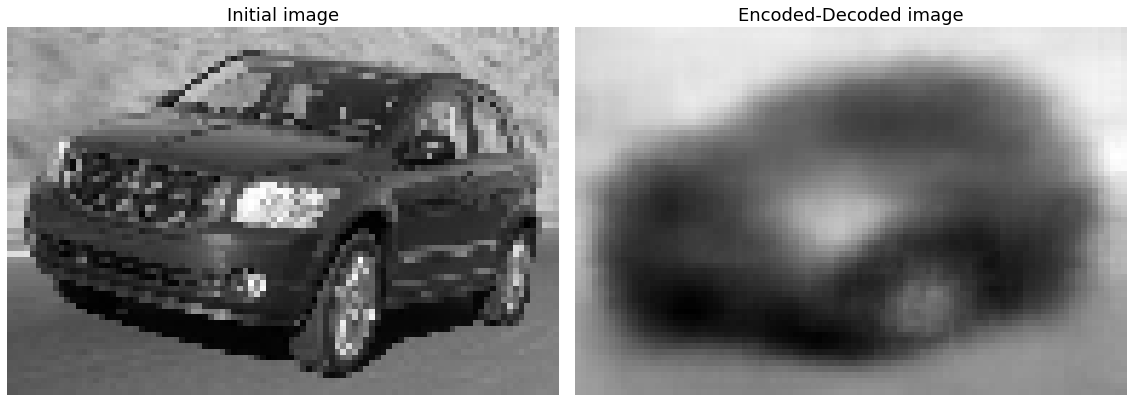

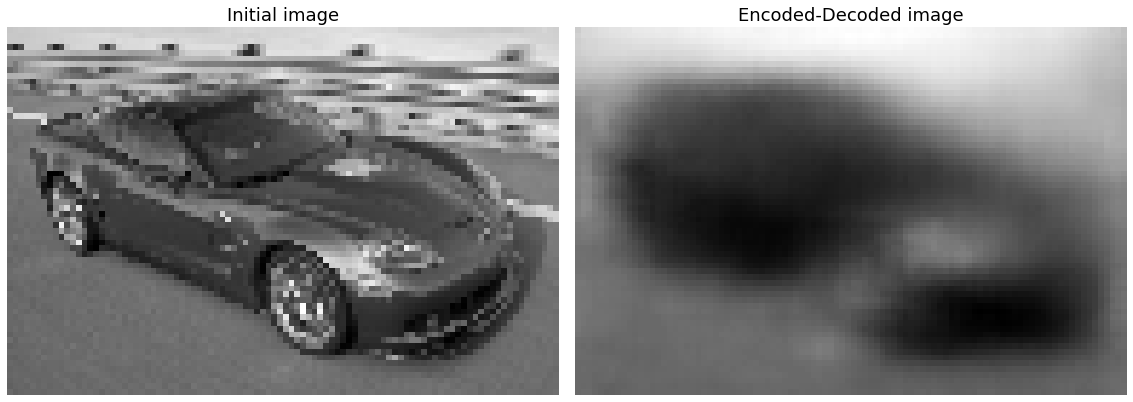

In [31]:
for i in [10,20,30]:
    show_reconstr_hor(images[i,:,:,0],vae_model=vae1_5)

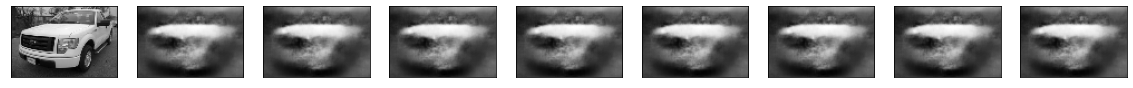

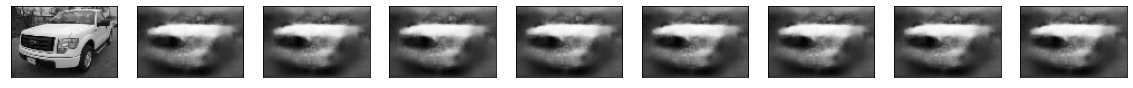

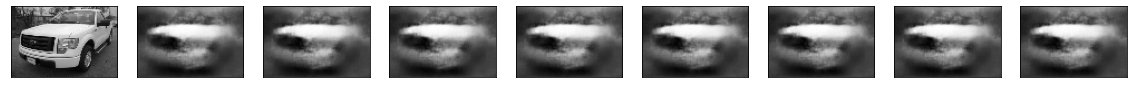

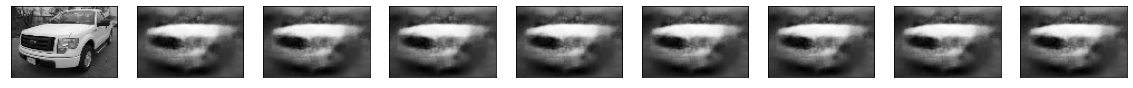

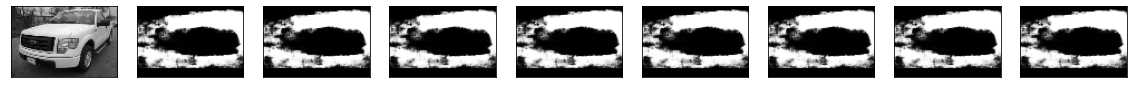

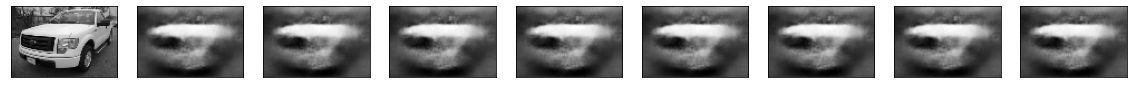

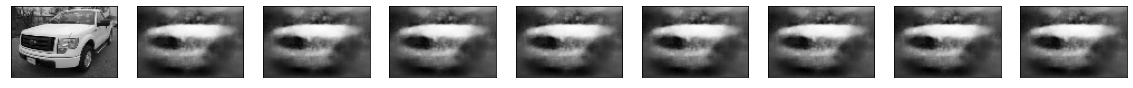

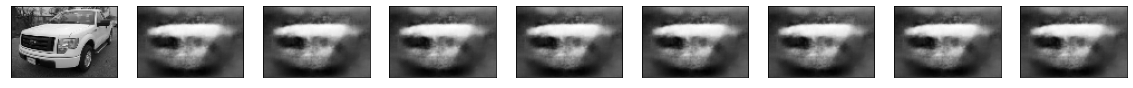

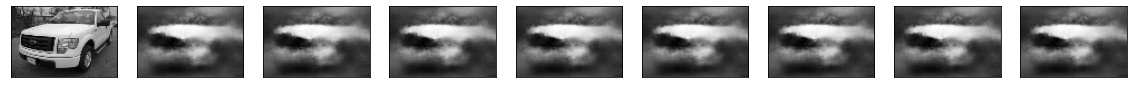

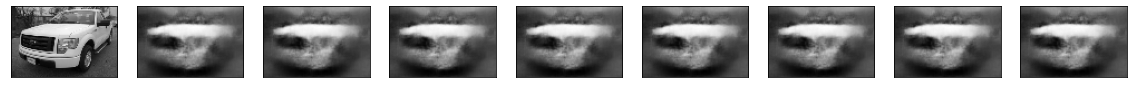

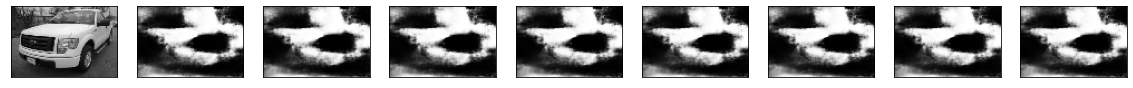

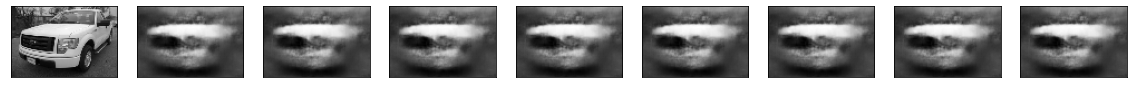

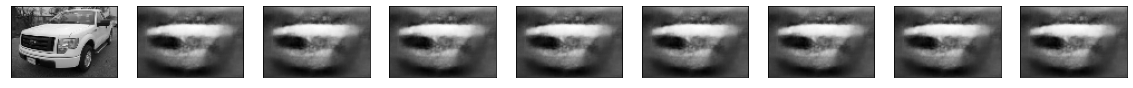

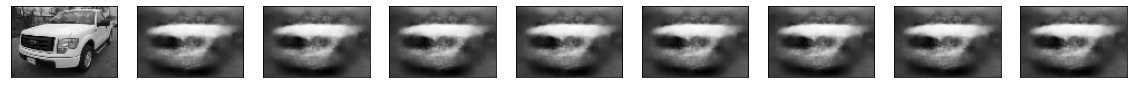

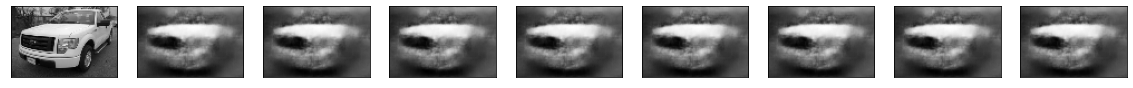

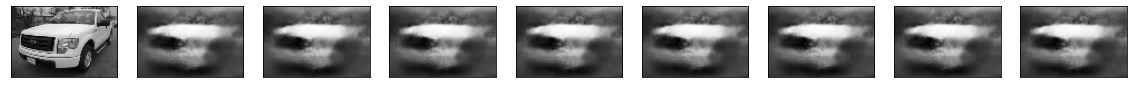

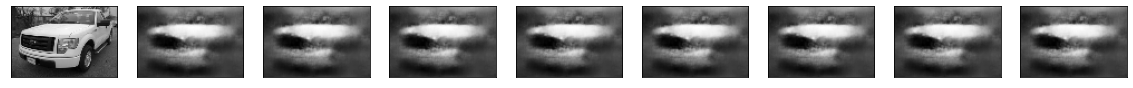

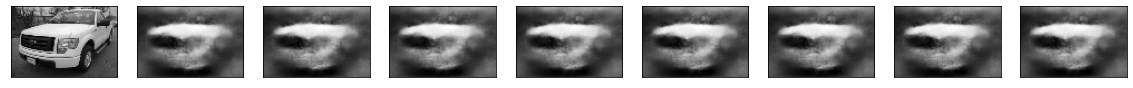

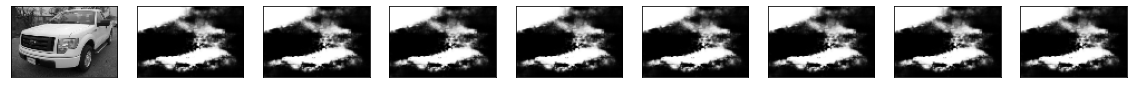

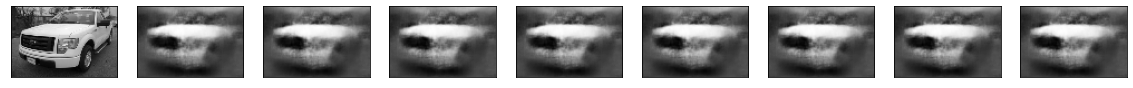

In [32]:
for i in range(0,100,5):
    generate_images2(vae_model=vae1_5, image=img, latent_dim=100, lat_feature=i, scale=20., N=8)

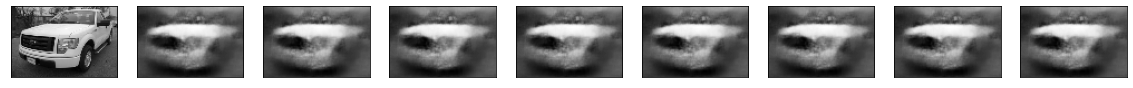

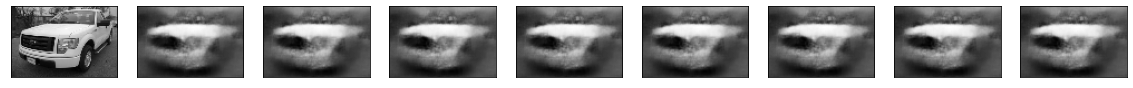

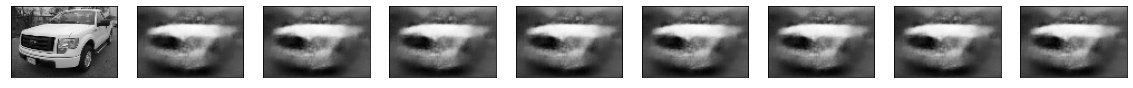

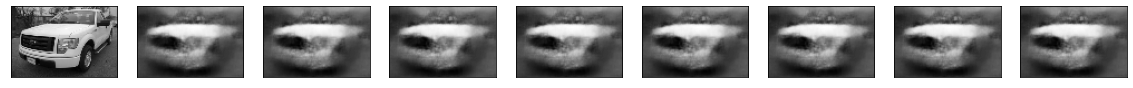

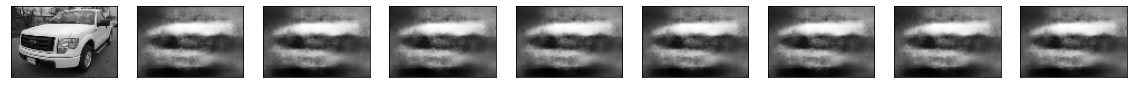

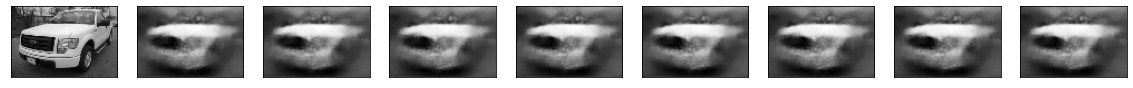

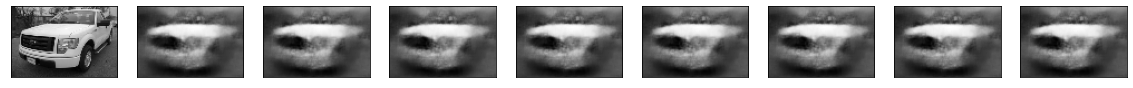

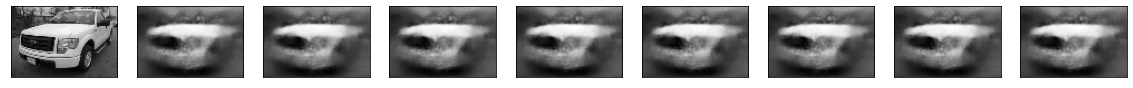

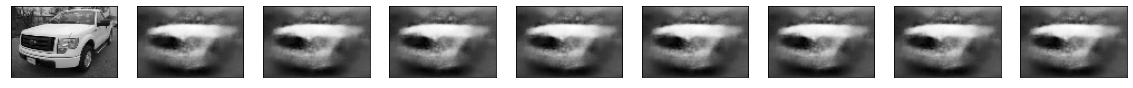

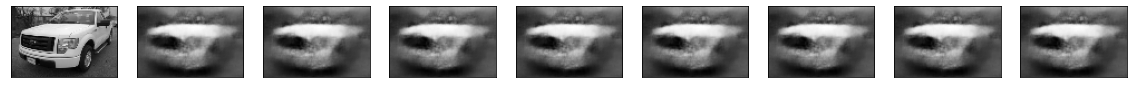

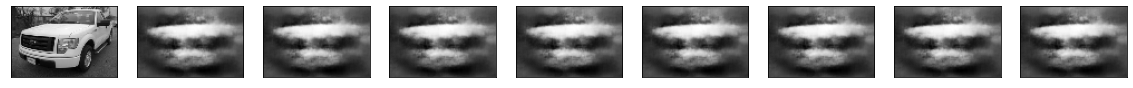

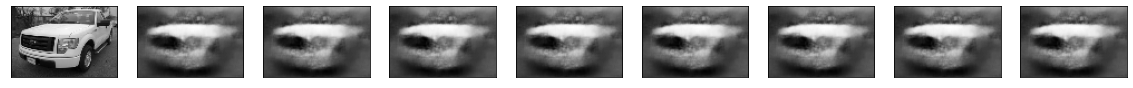

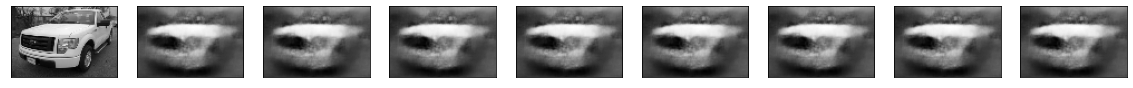

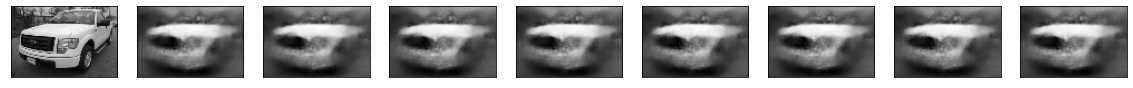

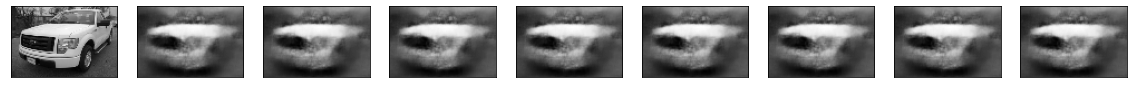

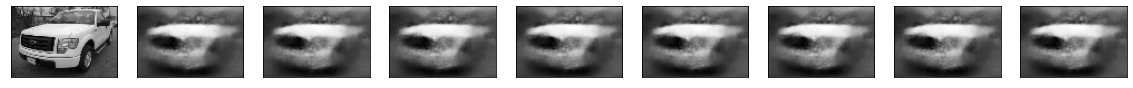

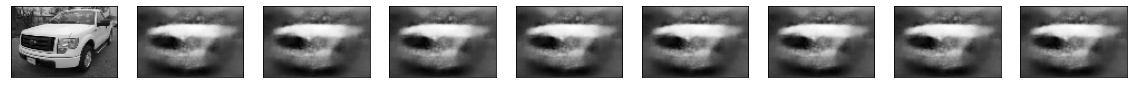

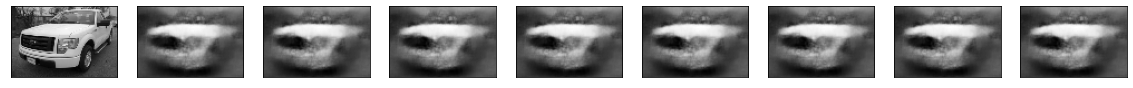

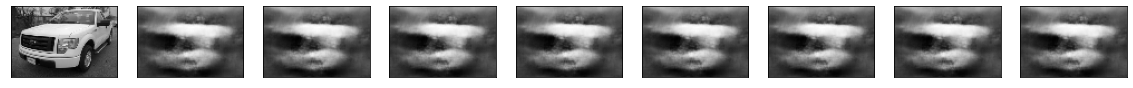

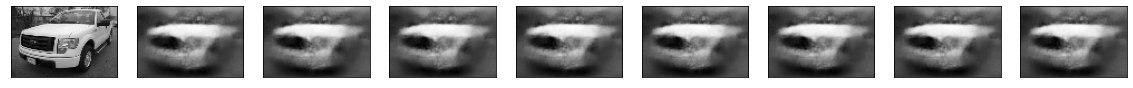

In [33]:
for i in range(0,100,5):
    generate_images2(vae_model=vae1_5, image=img, latent_dim=100, lat_feature=i, scale=3., N=8)